In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
import sys
print("Python version:", sys.version)

# Check scikit-learn version
import sklearn
print("scikit-learn version:", sklearn.__version__)


Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
scikit-learn version: 1.5.1


In [3]:
df=pd.read_csv('bio-5.csv')

In [4]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


In [5]:
X=df.drop(columns='pIC50')

In [6]:
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.to_csv('list.csv',index=False)

In [8]:
Y=df['pIC50']

In [9]:
Y.head()

0    4.000000
1    4.909742
2    4.000000
3    4.292685
4    4.000000
Name: pIC50, dtype: float64

In [10]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1,1,1,1,1,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0
1075,1,1,1,0,0,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
1076,1,1,1,0,0,1,1,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1077,1,1,1,0,0,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [11]:
X.to_csv('descriptor.csv', index = False)

In [12]:
model=RandomForestRegressor(n_estimators=100,bootstrap=True,random_state=42)

In [13]:
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8497605465860567

In [14]:
Y_pred = model.predict(X)
Y_pred

array([4.11093366, 4.65912355, 4.20632767, ..., 4.81760383, 4.60093142,
       5.92305745])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.04
Coefficient of determination (R^2): 0.85


Text(0.5, 0, 'Experimental pIC50')

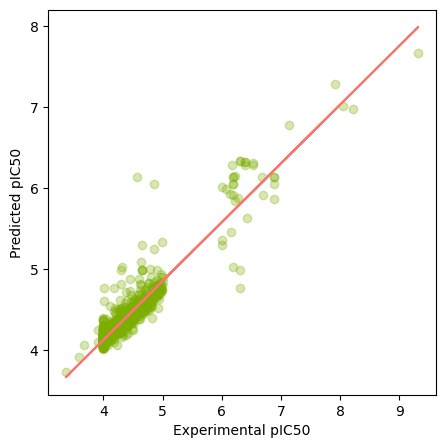

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [17]:
import pickle
pickle.dump(model, open('dengue_model.pkl', 'wb'))